In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# 데이터 로드
url = "C:/Users/gnssl/OneDrive/Documents/AI_Study/dataset.csv" 
df = pd.read_csv(url)

In [21]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["target"].sort_values(ascending=False)
print(correlation_with_target)


target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


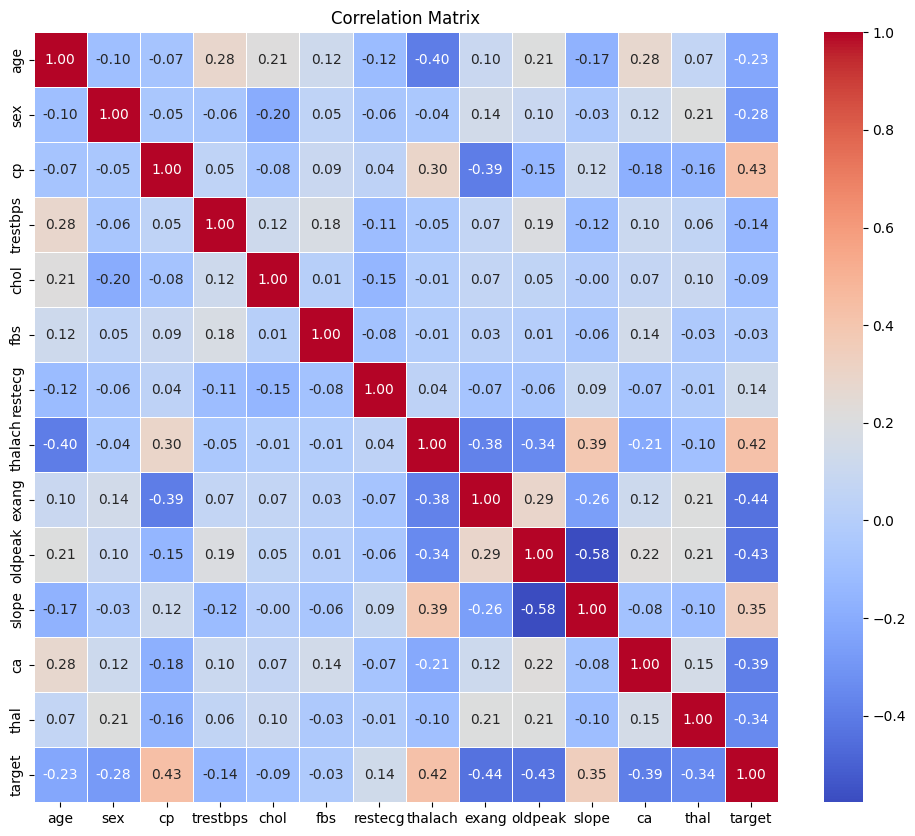

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 생성
correlation_matrix = df.corr()

# Heatmap을 사용하여 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("target", axis=1)
y = df["target"]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print(feature_importances_sorted)


cp          0.129029
oldpeak     0.125068
ca          0.117015
thalach     0.116270
thal        0.114188
age         0.084501
chol        0.078048
trestbps    0.068570
exang       0.056059
slope       0.048899
sex         0.032491
restecg     0.019432
fbs         0.010433
dtype: float64


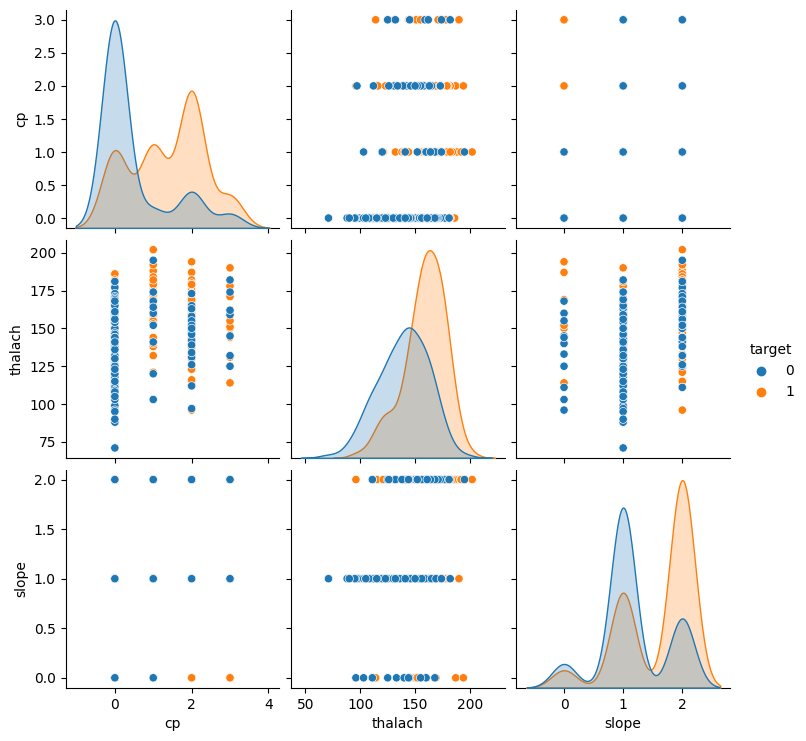

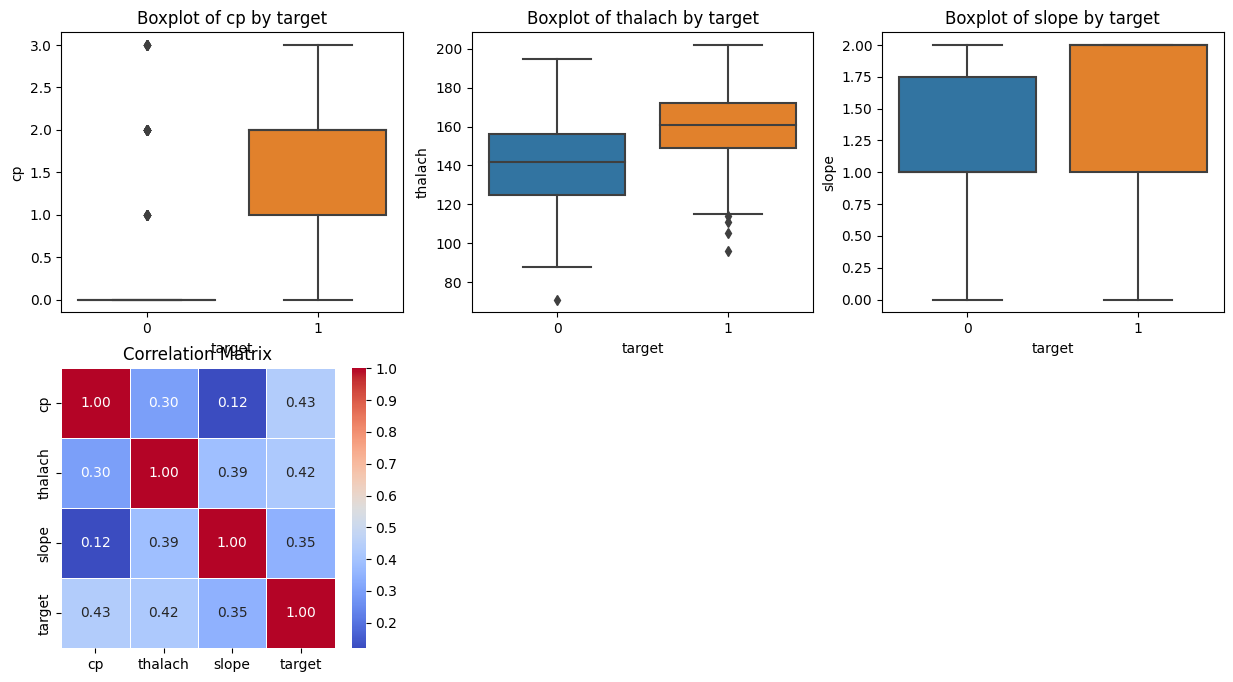

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 특성만 추출
selected_features = ['cp', 'thalach', 'slope', 'target']
selected_df = df[selected_features]

# Pairplot을 사용한 간단한 시각화
sns.pairplot(selected_df, hue='target', diag_kind='kde')
plt.show()

# Boxplot을 사용한 특성별 분포 시각화
plt.figure(figsize=(15, 8))
for i, feature in enumerate(selected_features[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by target')

# Heatmap을 사용한 상관관계 시각화
correlation_matrix_selected = selected_df.corr()
plt.subplot(2, 3, 4)
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")

plt.show()


In [27]:
X = df.drop('trestbps', axis=1)
y = df['trestbps']

# 데이터 전처리 및 분리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 회귀 모델 훈련 및 평가
models = {
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Regressor Mean Squared Error: {mse}")

SVM Regressor Mean Squared Error: 417.4648336383617
Decision Tree Regressor Mean Squared Error: 491.9836065573771
Random Forest Regressor Mean Squared Error: 381.5040229508197
K-Nearest Neighbors Regressor Mean Squared Error: 488.92983606557374
